# Datastory titel

introductie. 

In [13]:
{
    "tags": [
        "hide_input",
    ]
}
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
sea_level_df = pd.read_csv("Global_sea_level_rise.csv")



In [14]:
{
    "tags": [
        "hide_input",
    ]
}
import pandas as pd
sea_df = pd.read_csv('Global_sea_level_rise.csv')
dist_df = pd.read_csv('1900_2021_DISASTERS.xlsx - emdat data.csv')

tsunami_df = dist_df[dist_df['Disaster Subtype'].str.lower() == 'tsunami'].copy()
flood_df = dist_df[dist_df['Disaster Subtype'].str.lower() == 'flood'].copy()

tsunami_df.columns = tsunami_df.columns.str.strip()
flood_df.columns = flood_df.columns.str.strip()
sea_df.rename(columns={'year': 'Year'}, inplace=True)

#subsets om samen te voegen
tsunami_subset = tsunami_df[['Year', 'Disaster Subtype', 'Country', 'Region', 'Continent', 'Origin', 'River Basin',
                             'Total Deaths', 'Total Affected', "Total Damages ('000 US$)", 'Latitude', 'Longitude', 'Location']]

flood_subset = flood_df[['Year', 'Disaster Subtype', 'Country', 'Region', 'Continent', 'Origin', 'River Basin',
                         'Total Deaths', 'Total Affected', "Total Damages ('000 US$)", 'Latitude', 'Longitude', 'Location']]

#eerste twee samen voegen
disaster_df = pd.concat([tsunami_subset, flood_subset], ignore_index=True)

#laatste samenvoegen
merged_df = disaster_df.merge(sea_df[['Year', 'mmfrom1993-2008average']], on='Year', how='left')

#missende waardes invullen met 0
merged_df = merged_df.fillna(0)


In [15]:
{
    "tags": [
        "hide_input",
    ]
}
import numpy as np 
merged_df['Total Deaths'] = pd.to_numeric(merged_df['Total Deaths'], errors='coerce').fillna(0)
merged_df['Total Affected'] = pd.to_numeric(merged_df['Total Affected'], errors='coerce').fillna(0)
merged_df["Total Damages ('000 US$)"] = pd.to_numeric(merged_df["Total Damages ('000 US$)"], errors='coerce').fillna(0)

merged_df['Impact_Score'] = merged_df[['Total Deaths', 'Total Affected', "Total Damages ('000 US$)"]].max(axis=1)

merged_df = merged_df[(merged_df['Latitude'] != 0) & (merged_df['Longitude'] != 0)]

filtered_df = merged_df[merged_df['Impact_Score'] > 0].copy()

filtered_df['Impact_Score_Log'] = filtered_df['Impact_Score'].apply(lambda x: np.log10(x + 1))

filtered_df['Year'] = pd.to_numeric(filtered_df['Year'], errors='coerce')
filtered_df = filtered_df.dropna(subset=['Year'])
filtered_df = filtered_df.sort_values('Year')
filtered_df['Year'] = filtered_df['Year'].astype(int)

## kopje argument 1

tekst die erbij hoort: introductie tot het argument ect.

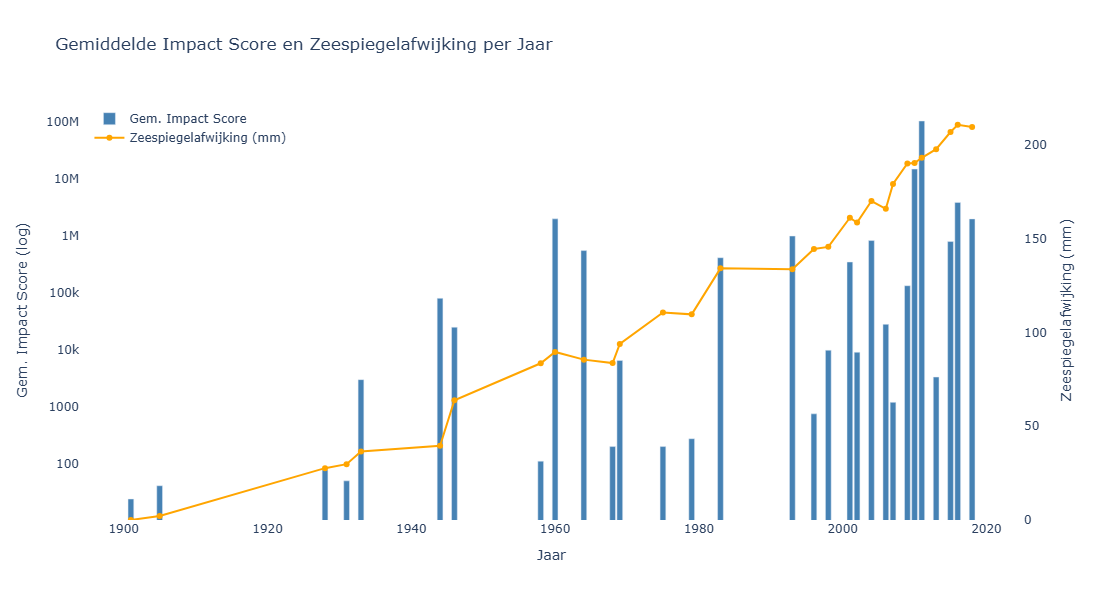

In [16]:
{
    "tags": [
        "hide_input",
    ]
}
import plotly.graph_objects as go

avg_impact_per_year = filtered_df.groupby('Year')['Impact_Score'].mean().reset_index()

fig = go.Figure()


fig.add_trace(go.Bar(
    x=avg_impact_per_year['Year'],
    y=avg_impact_per_year['Impact_Score'],
    name='Gem. Impact Score',
    marker_color='steelblue',
    yaxis='y1',
    hovertemplate='Jaar: %{x}<br>Gem. Impact Score: %{y}<extra></extra>'
))
# Maak zeespiegelwaarden relatief t.o.v. het eerste jaar
first_year = filtered_df['Year'].min()
baseline = filtered_df.loc[filtered_df['Year'] == first_year, 'mmfrom1993-2008average'].values[0]
filtered_df['mmfrom1993-2008average'] = filtered_df['mmfrom1993-2008average'] - baseline

sea_level_data = filtered_df[['Year', 'mmfrom1993-2008average']].drop_duplicates()

fig.add_trace(go.Scatter(
    x=sea_level_data['Year'],
    y=sea_level_data['mmfrom1993-2008average'],
    name='Zeespiegelafwijking (mm)',
    mode='lines+markers',
    line=dict(color='orange', width=2),
    yaxis='y2',
    hovertemplate='Jaar: %{x}<br>Zeespiegelafwijking: %{y} mm<extra></extra>'
))

fig.update_layout(
    title="Gemiddelde Impact Score en Zeespiegelafwijking per Jaar",
    xaxis=dict(title='Jaar'),
    yaxis=dict(
        title='Gem. Impact Score',
        showgrid=False,
        side='left',
        rangemode='tozero'
    ),
    yaxis2=dict(
        title='Zeespiegelafwijking (mm)',
        overlaying='y',
        side='right',
        showgrid=False,
        rangemode='tozero'
    ),
    legend=dict(x=0.01, y=0.99),
    height=600,
    plot_bgcolor='white'
)

fig.update_layout(
    yaxis=dict(
        title='Gem. Impact Score (log)',
        type='log', 
        showgrid=False,
        side='left',
        rangemode='tozero'
    ),
)

fig.show()
  

argumentatie aan de hand van plot.

## titel argument 3
intro

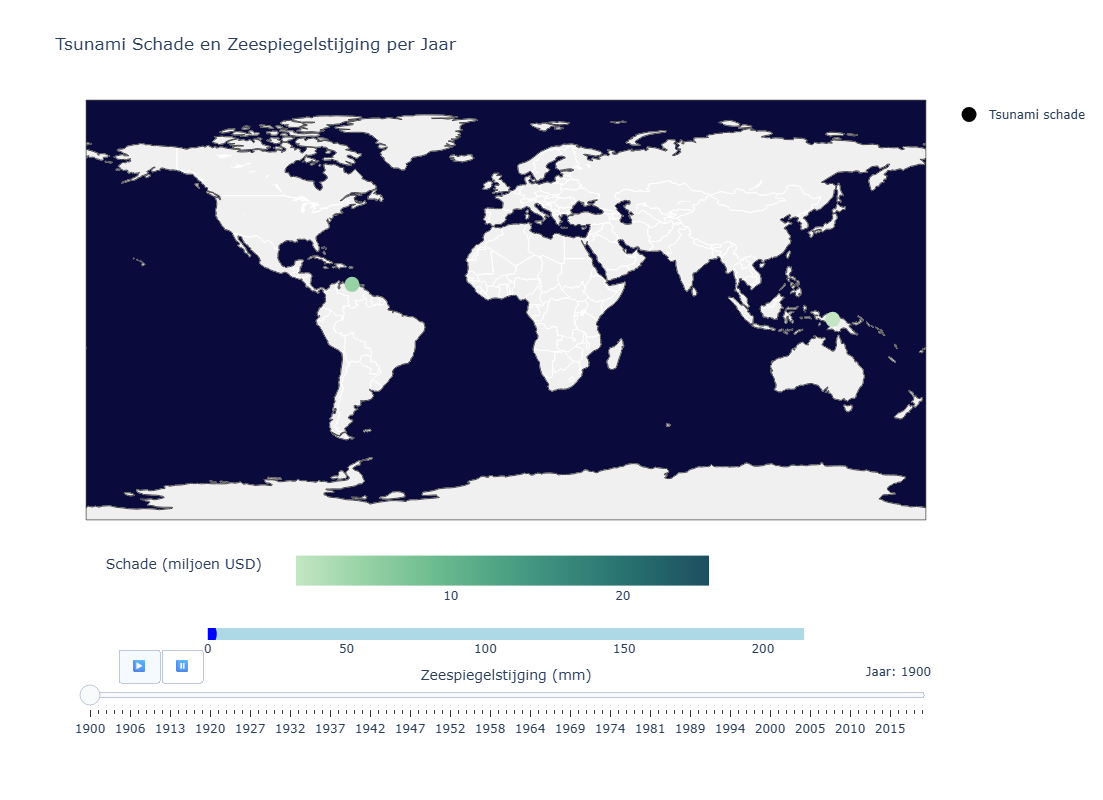

In [10]:
import pandas as pd
import plotly.graph_objects as go
import re

# Data inladen
tsunami_df = pd.read_csv("tsunami_dataset.csv")
sea_level_df = pd.read_csv("Global_sea_level_rise.csv")

# Schoonmaken tsunami data
tsunami_df = tsunami_df[['YEAR', 'DAMAGE_TOTAL_DESCRIPTION', 'COUNTRY', 'LONGITUDE', 'LATITUDE','DEATHS_TOTAL_DESCRIPTION', 'HOUSES_TOTAL_DESCRIPTION']].dropna()
tsunami_df['YEAR'] = tsunami_df['YEAR'].astype(int)

# Schoonmaken zeespiegel data
sea_level_df = sea_level_df.rename(columns={'year': 'Year', 'mmfrom1993-2008average': 'Sea_Level_Change_mm'})
sea_level_df['Year'] = sea_level_df['Year'].astype(int)
sea_level_df = sea_level_df.sort_values('Year')

# Baseline 1900 bepalen
if 1900 in sea_level_df['Year'].values:
    baseline = sea_level_df.loc[sea_level_df['Year'] == 1900, 'Sea_Level_Change_mm'].values[0]
else:
    closest_year = sea_level_df.iloc[(sea_level_df['Year'] - 1900).abs().argsort()[:1]]['Year'].values[0]
    baseline = sea_level_df.loc[sea_level_df['Year'] == closest_year, 'Sea_Level_Change_mm'].values[0]

sea_level_df['Sea_Level_Change_mm'] = sea_level_df['Sea_Level_Change_mm'] - baseline

# Zeespiegel smoothen met rolling average over 5 jaar
sea_level_df['Sea_Level_Change_mm'] = sea_level_df['Sea_Level_Change_mm'].rolling(window=5, center=True, min_periods=1).mean()

# Merge datasets en filter vanaf 1900
merged = pd.merge(tsunami_df, sea_level_df, left_on='YEAR', right_on='Year', how='inner')
merged = merged[merged['YEAR'] >= 1900].copy()

# Schadebedrag parseren
def parse_damage_amount(description):
    if not isinstance(description, str):
        return 0
    description = description.lower().replace(",", "")
    match = re.search(r'([\d\.]+)\s*(billion|million|thousand)?', description)
    if match:
        amount = float(match.group(1))
        unit = match.group(2)
        if unit == 'billion':
            return amount * 1_000
        elif unit == 'million':
            return amount
        elif unit == 'thousand':
            return amount / 1_000
        else:
            return amount
    return 0

merged['Estimated_Damage_MillionUSD'] = merged['DAMAGE_TOTAL_DESCRIPTION'].apply(parse_damage_amount).round(1)
merged['Sea_Level_Change_mm'] = merged['Sea_Level_Change_mm'].round(2)

min_sea = 0
max_sea = merged['Sea_Level_Change_mm'].max()
min_damage = merged['Estimated_Damage_MillionUSD'].min()
max_damage = merged['Estimated_Damage_MillionUSD'].max()

years = sorted(merged['YEAR'].unique())
jaar_0 = years[0]
df_year_0 = merged[merged['YEAR'] == jaar_0]

# Schade-intervals instellen in stappen van 10 miljoen (of groter als nodig)
step_size = max(10, int((max_damage - min_damage) / 10))
schade_ticks = list(range(0, int(max_damage) + step_size, step_size))

fig = go.Figure()

# Wereldkaart tsunami schade (Scattergeo) met coloraxis
fig.add_trace(go.Scattergeo(
    lon=df_year_0['LONGITUDE'],
    lat=df_year_0['LATITUDE'],
    text=df_year_0['COUNTRY'] + "<br>Schade: " + df_year_0['Estimated_Damage_MillionUSD'].astype(str) + " M$",
    marker=dict(
        color=df_year_0['Estimated_Damage_MillionUSD'],
        colorscale='OrRd',
        cmin=min_damage,
        cmax=max_damage,
        size=15,  # bollen groter gemaakt
        colorbar=None
    ),
    name='Tsunami schade',
    hoverinfo='text'
))

# Schadekleurbalk wordt via coloraxis toegevoegd in layout

# Zeespiegelbalk (lijn + bolletje)
fig.add_trace(go.Scatter(
    x=[min_sea, max_sea],
    y=[0, 0],
    mode='lines',
    line=dict(color='lightblue', width=20),
    showlegend=False,
    xaxis='x2',
    yaxis='y2'
))
fig.add_trace(go.Scatter(
    x=[merged[merged['YEAR'] == jaar_0]['Sea_Level_Change_mm'].mean()],
    y=[0],
    mode='markers',
    marker=dict(size=30, color='blue'),  # bollen groter gemaakt
    showlegend=False,
    xaxis='x2',
    yaxis='y2'
))

# Frames voor animatie
frames = []
for year in years:
    df_year = merged[merged['YEAR'] == year]
    sea_val = df_year['Sea_Level_Change_mm'].mean()
    frames.append(go.Frame(
        data=[
            go.Scattergeo(
                lon=df_year['LONGITUDE'],
                lat=df_year['LATITUDE'],
                marker=dict(color=df_year['Estimated_Damage_MillionUSD'], size=15),  # bollen groter
                text=df_year['COUNTRY'] + "<br>Schade: " + df_year['Estimated_Damage_MillionUSD'].astype(str) + " M$",
            ),
            go.Scatter(
                x=[min_sea, max_sea],
                y=[0, 0],
                mode='lines',
                line=dict(color='lightblue', width=20),
                xaxis='x2',
                yaxis='y2',
                showlegend=False
            ),
            go.Scatter(
                x=[sea_val],
                y=[0],
                mode='markers',
                marker=dict(size=30, color='blue'),  # bollen groter
                xaxis='x2',
                yaxis='y2',
                showlegend=False
            )
        ],
        name=str(year)
    ))

fig.frames = frames

# Coloraxis toewijzen aan scattergeo marker en frames
fig['data'][0]['marker']['coloraxis'] = 'coloraxis'
for frame in fig.frames:
    frame.data[0]['marker']['coloraxis'] = 'coloraxis'

# Layout update met kaart, coloraxis en assen voor zeespiegel en schade, netjes onder elkaar
fig.update_layout(
    title_text='Tsunami Schade en Zeespiegelstijging per Jaar',
    geo=dict(
        scope='world',
        projection_type='equirectangular',
        showland=True,
        landcolor="rgb(240, 240, 240)",
        oceancolor="rgb(10, 10, 60)",
        showocean=True,
        showcountries=True,
        countrycolor="white",
        lonaxis_range=[-180, 180],
        lataxis_range=[-90, 90],
        domain=dict(x=[0, 1], y=[0.3, 1])  # kaart groter maken (lager beginnen)
    ),
    height=800,  # verhoogde hoogte om alles te laten passen
    margin=dict(t=100, b=100),

    coloraxis=dict(
        colorscale='blugrn',
        cmin=min_damage,
        cmax=max_damage,
        colorbar=dict(
            title=dict(
                text='Schade (miljoen USD)',
                font=dict(size=14)
            ),
            orientation='h',
            yanchor='bottom',
            y=0.15,  # lager geplaatst onder de kaart
            xanchor='center',
            x=0.4,
            len=0.7,
            tickmode='array',
            tickvals=schade_ticks,
            tickfont=dict(size=12)
        )
    ),

    # Zeespiegel balk assen, lager geplaatst onder de schade-kleurbalk
    xaxis2=dict(
        domain=[0.15, 0.85],
        anchor='y2',
        range=[min_sea, max_sea],
        title=dict(
            text='Zeespiegelstijging (mm)',
            font=dict(size=14)
        ),
        showgrid=False,
        zeroline=False,
        showticklabels=True,
        tickfont=dict(size=12),
        position=0.0,  # lager dan eerder
        side='bottom'
    ),
    yaxis2=dict(
        domain=[0.1, 0.12],  # lager dan eerder
        anchor='x2',
        showticklabels=False,
        showgrid=False,
        zeroline=False
    ),

    # Knoppen boven de slider (jaarbalk) met iconen
    updatemenus=[dict(
        type='buttons',
        direction='right',
        showactive=True,
        x=0.1,
        y=0.03,  # hoger dan slider, dus boven jaarbalk
        xanchor='center',
        yanchor='bottom',
        pad={"r": 10, "t": 10},
        buttons=[
            dict(
                method='animate',
                args=[None, {'frame': {'duration': 600, 'redraw': True}, 'fromcurrent': True}],
                label='▶️'
            ),
            dict(
                method='animate',
                args=[[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate'}],
                label='⏸️'
            )
        ]
    )],

    # Slider (jaarbalk) iets lager dan knoppen
    sliders=[{
        "currentvalue": {"prefix": "Jaar: ", "visible": True, "xanchor": "right"},
        "steps": [{
            "args": [[str(year)], {"frame": {"duration": 800, "redraw": True}, "mode": "immediate"}],
            "label": str(year),
            "method": "animate"
        } for year in years],
        "x": 0,
        "y": 0.15,  # lager dan de knoppen
        "len": 1.0,
        "xanchor": "left",
        "yanchor": "top",
        "pad": {"b": 10, "t": 50},
    }]
)

fig.show()


argumentatie en 2e plot hieronder introduceren want hoort bij hetzelfde argument

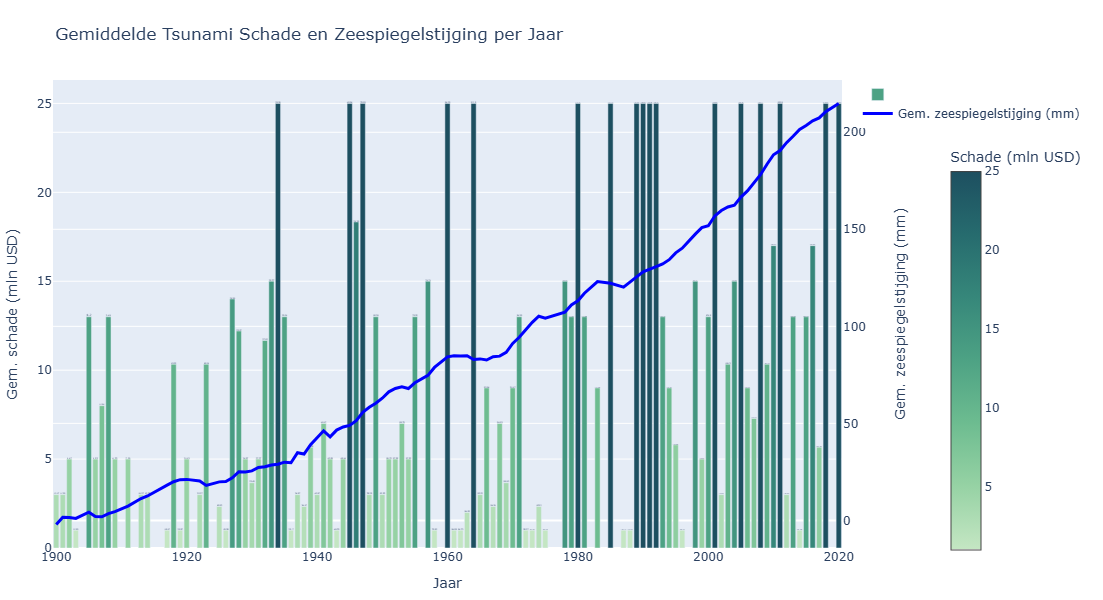

In [11]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import re

# ------- 1. Parser voor schadebedragen -------
def parse_damage(val):
    if pd.isna(val):
        return np.nan
    val = val.upper().strip()

    if 'BILLION' in val or 'B' in val:
        nums = re.findall(r'\d+\.?\d*', val)
        if nums:
            return float(nums[0]) * 1000
    elif 'MILLION' in val or 'M' in val:
        nums = re.findall(r'\d+\.?\d*', val)
        if nums:
            return float(nums[0])
    elif 'LIMITED' in val or 'LIITED' in val or '<$1' in val:
        return 0.5
    else:
        nums = re.findall(r'\d+\.?\d*', val)
        if nums:
            return float(nums[0])

    return np.nan

# ------- 2. Kolommen hernoemen & schade omzetten -------
merged = merged.rename(columns={
    'year': 'YEAR',
    'mmfrom1993-2008average': 'Sea_Level_Change_mm'
})

merged['Estimated_Damage_MillionUSD'] = merged['DAMAGE_TOTAL_DESCRIPTION'].apply(parse_damage)

# ------- 3. Gemiddelden per jaar berekenen -------
bubble_data = merged.groupby('YEAR').agg({
    'Sea_Level_Change_mm': 'mean',
    'Estimated_Damage_MillionUSD': 'mean',
    'DAMAGE_TOTAL_DESCRIPTION': 'count'
}).reset_index().rename(columns={'DAMAGE_TOTAL_DESCRIPTION': 'Tsunami_Count'})

# Filter voor geldige waarden en max schade 15 miljoen
bubble_data = bubble_data.dropna(subset=['Sea_Level_Change_mm', 'Estimated_Damage_MillionUSD'])
bubble_data = bubble_data[bubble_data['Estimated_Damage_MillionUSD'] <= 100]

# ------- 4. Plot met bar (schade) + lijn (zeespiegel) -------
fig = go.Figure()

# Bar voor schade met aangepaste hover info én verplaatste colorbar
fig.add_trace(go.Bar(
    x=bubble_data['YEAR'],
    y=bubble_data['Estimated_Damage_MillionUSD'],
    name='',
    marker=dict(
        color=bubble_data['Estimated_Damage_MillionUSD'],
        colorscale='blugrn',
        colorbar=dict(
            title='Schade (mln USD)',
            x=1.125,            # Iets naar rechts verplaatst
            y=0.425,             # Iets naar beneden (midden van de grafiek)
            xanchor='left',
            yanchor='middle',
            len=0.9           # Korte schaalbalk
        ),
        showscale=True
    ),
    hovertemplate=
        '<b>Jaar:</b> %{x}<br>'+
        '<b>Gem. schade:</b> %{y:.2f} mln USD<br>'+
        '<b>Aantal tsunami’s:</b> %{customdata}<br>'+
        '<b>Gem. zeespiegelstijging:</b> %{text:.2f} mm<br>',
    customdata=bubble_data['Tsunami_Count'],
    text=bubble_data['Sea_Level_Change_mm'],
))


# Lijn voor zeespiegel zonder markers, met eigen y-as
fig.add_trace(go.Scatter(
    x=bubble_data['YEAR'],
    y=bubble_data['Sea_Level_Change_mm'],
    name='Gem. zeespiegelstijging (mm)',
    yaxis='y2',
    mode='lines',  # alleen lijn, geen markers
    line=dict(color='blue', width=3),
    hoverinfo='none'  # hover info via bar, dus hier niet nodig
))

# Layout met twee y-assen
fig.update_layout(
    title='Gemiddelde Tsunami Schade en Zeespiegelstijging per Jaar',
    xaxis=dict(title='Jaar'),
    yaxis=dict(
        title='Gem. schade (mln USD)',
        rangemode='tozero'
    ),
yaxis2=dict(
    title='Gem. zeespiegelstijging (mm)',
    overlaying='y',
    side='right',
    rangemode='tozero',
    title_font=dict(
        size=14,
    ),
    title_standoff=30
),

    height=600,
    width=1100,
    margin=dict(l=50, r=80, t=80, b=50)
)

fig.show()

Conclusie van agrumentatie aan dehand van de plots.

## 3e agrument van verwoeste huizen en doden.
uitelg

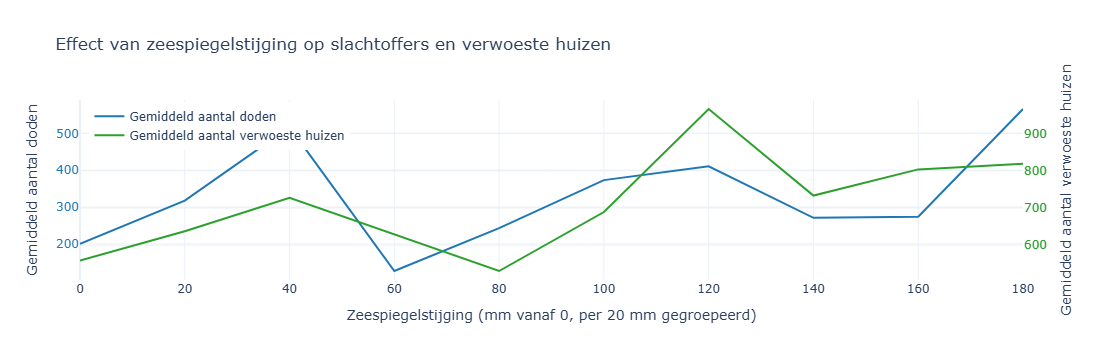

In [12]:
import pandas as pd
import plotly.graph_objs as go

# --- 1. Mapping naar numerieke doden ---
deaths_mapping = {
    "None reported": 0,
    "Few (~1 to 50 people)": 25,
    "Some (~51 to 100 people)": 75,
    "Many (~101 to 1,000 people)": 550,
    "Very Many (~1001 or more people)": 1500
}
houses_map = {
    'Few (~1 to 50 houses)': 25,
    'Some (~51 to 100 houses)': 75,
    'Many (~101 to 1000 houses)': 550,
    'Very Many (~1001 or more houses)': 1500
}
merged["HOUSES_ESTIMATED"] = merged["HOUSES_TOTAL_DESCRIPTION"].map(houses_map)
merged["DEATHS_ESTIMATED"] = merged["DEATHS_TOTAL_DESCRIPTION"].map(deaths_mapping)

# --- 2. Zeespiegel corrigeren ---
min_sea = merged["Sea_Level_Change_mm"].min()
merged["Sea_Level_Corrected"] = merged["Sea_Level_Change_mm"] - min_sea

# --- 3. Bepaal decennium (optioneel) ---
merged["Decennium"] = (merged["Year"] // 10) * 10

# --- 4. Groeperen per 20mm zeespiegelbin ---
merged["Sea_Level_Bin"] = (merged["Sea_Level_Corrected"] // 20) * 20
grouped = merged.groupby("Sea_Level_Bin").agg({
    "DEATHS_ESTIMATED": "mean",
    "HOUSES_ESTIMATED": "mean",
    "Year": lambda x: int(x.mean())  # gemiddeld jaar als representatie
}).reset_index()

# --- 5. Laatste bin verwijderen ---
max_bin = grouped["Sea_Level_Bin"].max()
grouped = grouped[grouped["Sea_Level_Bin"] < max_bin]

# --- 6. Plot maken ---
fig = go.Figure()
min_sea = merged["Sea_Level_Change_mm"].min()
merged["Sea_Level_Corrected"] = merged["Sea_Level_Change_mm"] - min_sea


merged["Sea_Level_Bin"] = (merged["Sea_Level_Corrected"] // 20) * 20
grouped = merged.groupby("Sea_Level_Bin").agg({
    "DEATHS_ESTIMATED": "mean",
    "HOUSES_ESTIMATED": "mean",
    "Year": lambda x: int(x.mean())  # gemiddeld jaar als representatie
}).reset_index()

# --- 5. Laatste bin verwijderen ---
max_bin = grouped["Sea_Level_Bin"].max()
grouped = grouped[grouped["Sea_Level_Bin"] < max_bin]


# Lijn: Aantal doden (blauwgroen tint)
fig.add_trace(go.Scatter(
    x=grouped["Sea_Level_Bin"],
    y=grouped["DEATHS_ESTIMATED"],
    name="Gemiddeld aantal doden",
    mode="lines",
    line=dict(color="#1f77b4"),  # steel blue / blauw tint
    hovertemplate=(
        "%{y:.0f}<br>"
    ),
    customdata=grouped[["Year"]].values
))

# Lijn: Aantal verwoeste huizen (groentint)
fig.add_trace(go.Scatter(
    x=grouped["Sea_Level_Bin"],
    y=grouped["HOUSES_ESTIMATED"],
    name="Gemiddeld aantal verwoeste huizen",
    mode="lines",
    line=dict(color="#2ca02c"),  # forest green / groen tint
    yaxis="y2",
    hovertemplate=(
        "%{y:.0f}<br>" +
        "Zeespiegelstijging: %{x:.0f} mm<br>" +
        "Gemiddeld jaar: %{customdata[0]:.0f}"
    ),
    customdata=grouped[["Year"]].values
))

# --- 7. Layout ---
fig.update_layout(
    title="Effect van zeespiegelstijging op slachtoffers en verwoeste huizen",
    xaxis=dict(title="Zeespiegelstijging (mm vanaf 0, per 20 mm gegroepeerd)"),
    yaxis=dict(
        title="Gemiddeld aantal doden",
        tickfont=dict(color="#1f77b4")  # zelfde blauw als lijn
    ),
    yaxis2=dict(
        title="Gemiddeld aantal verwoeste huizen",
        tickfont=dict(color="#2ca02c"),  # zelfde groen als lijn
        overlaying="y",
        side="right"
    ),
    legend=dict(x=0.01, y=0.99),
    template="plotly_white",
    hovermode="x unified"
)

fig.show()


argumentatie.